# **Case de Analise de Dados: CRM iFood**

#Este case foi usado em um processo seletivo para o cargo de Analista de Dados no **iFood Brain Team**.

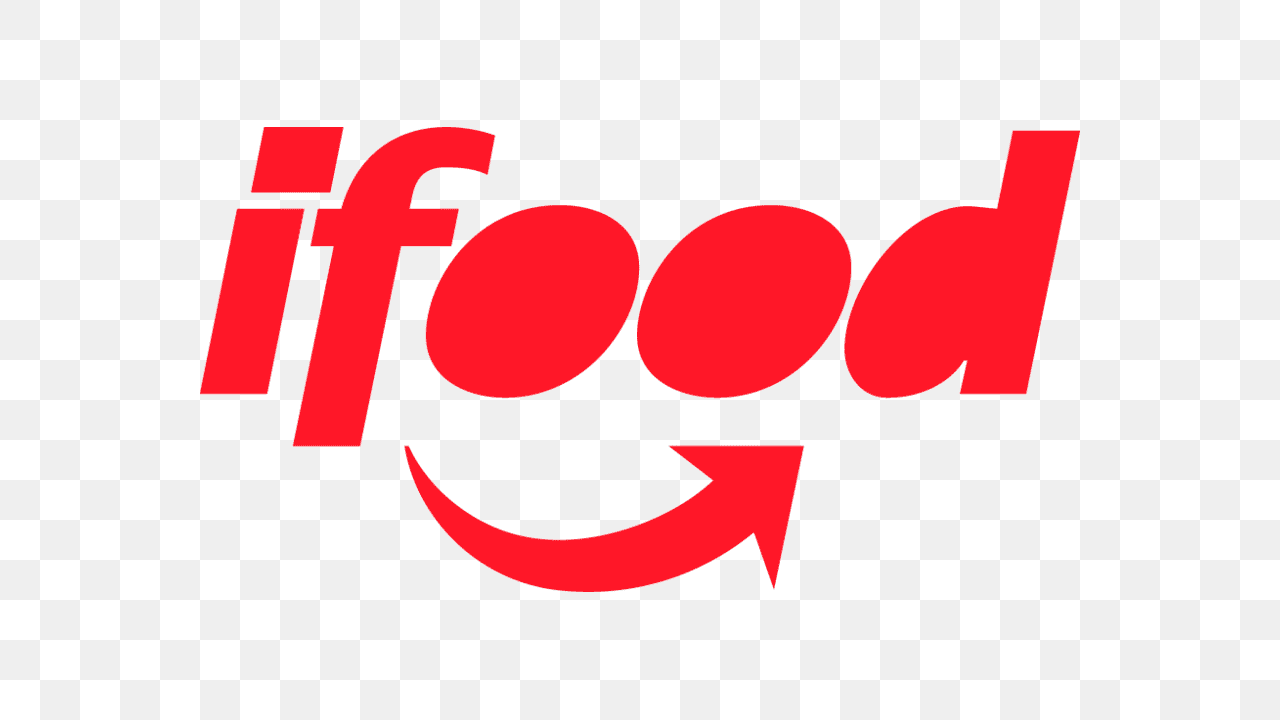


O Dataset original e demais informações foram retirados de:
* https://www.kaggle.com/datasets/jackdaoud/marketing-data
* https://github.com/nailson/ifood-data-business-analyst-test/blob/master/README.md

Nele, constam informações de 2205 clientes, com dados referentes à:

* Perfil do Cliente
* Preferências de Produtos
* Sucessos/Falhas de Campanha
* Performance dos variados canais de comunicação e marketing


# Introdução

Uma empresa do ramo alimentício realizará uma campanha de marketing agendada para o próximo mês e deseja potencializar sua estratégia para obter o maior lucro possível, com base em dados coletados na última campanha.

A última campanha envolveu 2205 clientes, dos quais foram recolhidos: dados pessoais, dados de comportamento e preferências de compra, dados de valores gastos e feedbacks de aceitação a campanhas anteriores.


# Objetivo

Com base nos dados fornecidos, buscaremos:
1.	Entender as características e o **comportamento dos clientes** e o seus **impactos no faturamento.**
2.	Direcionar a nova campanha de marketing para um **público segmentado**.
3.	Desenvolveremos um modelo preditivo que permita **maximizar o lucro da campanha.**

Para tal, seguiremos os seguintes passos:
1.	**Exploração** dos dados
2.	**Segmentação** do publico
3.	Reconhecimento de padrões e **construção de um perfil alvo**
para a próxima campanha de marketing a ser realizada

Para fins de análise, consideraremos: Maior sucesso da campanha => Maior Receita (Maior gasto total do cliente)


# **Legenda**

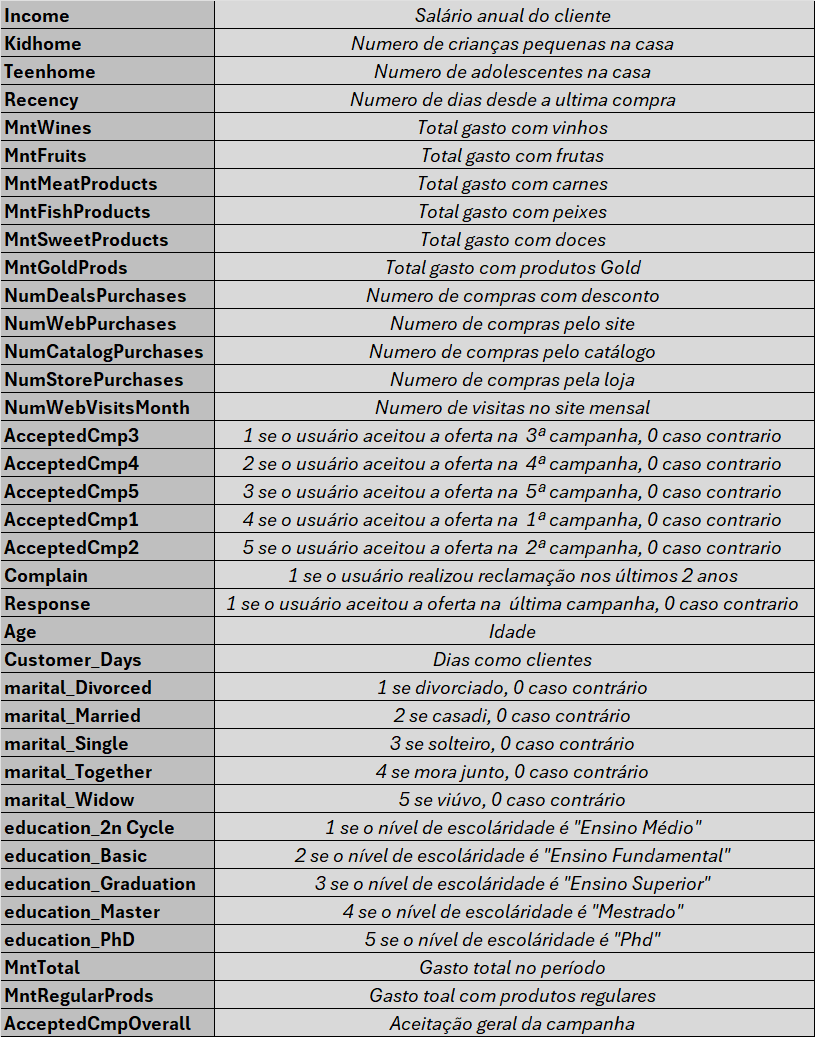

# Importando as bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

# Carregando e realizando a análise prévia dos dados

In [ ]:
clients = pd.read_csv("ifood_df_original.csv")

In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

# **Com o objetivo de obter a melhor segmentação, esta análise seguirá os princípios da Análise de Pareto.**

Criada pelo  consultor de negócios Joseph Moses Juran e amplamente utilizada em áreas como Marketing, Economia e Ciências, a Análise de Pareto preconiza, em linhas gerais, que 20% dos fatores determinam, em média, 80% dos resultados.

Graças a isso, também é conhecida como "Regra do 80/20"

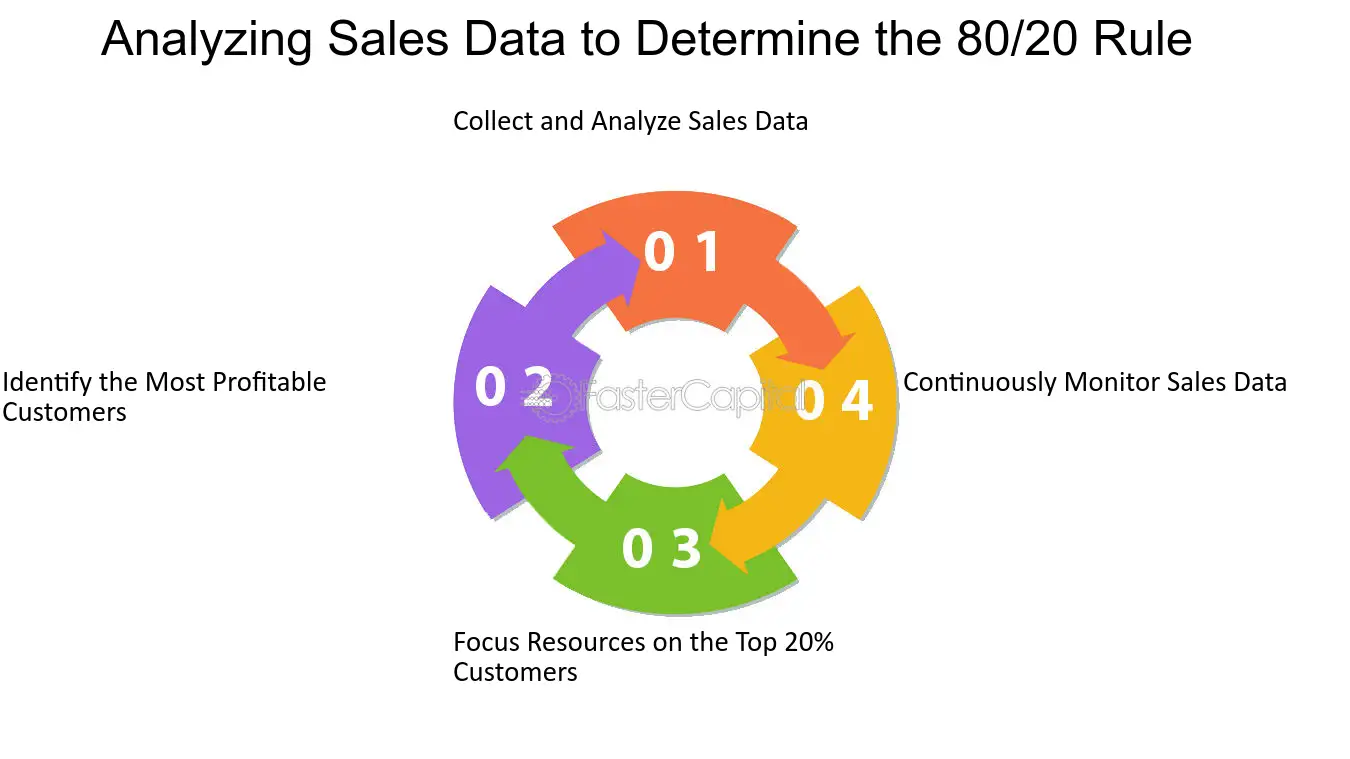

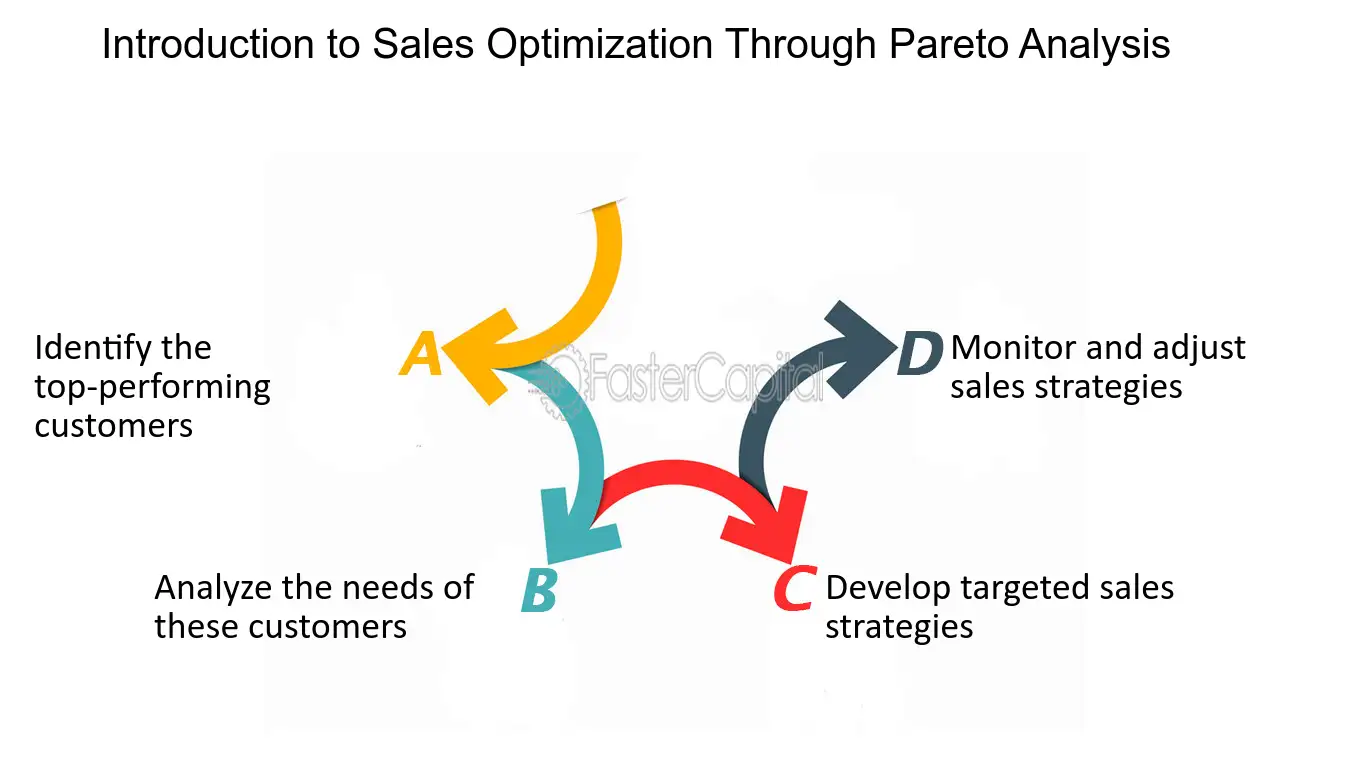

# Neste sentido, esta análise seguirá as seguintes etapas:

1 - Selecionar os top 20% clientes dos dados levantados, ou seja, os **20% clientes que geraram mais receita na última campanha** (441 de um total de 2205).



2- **Investigar o perfil deste segmento**, para assim possibilitar que o time de Marketing possa **canalizar sua estratégia para o público que trará a maior receita** possível para a campanha. **bold text**

In [ ]:
clients_top20 = clients['MntTotal'].sort_values(ascending = False).reset_index()[:441]
clients_top20

,index,MntTotal
0,1467,2491
1,1159,2429
2,1547,2429
3,1433,2304
4,967,2304
...,...,...
436,1426,1103
437,488,1102
438,1998,1101
439,910,1101


In [ ]:
index = []
for i in range (0,441):
  a = clients_top20['index'].loc[i]
  index.append(a)


Um ponto importante é que, filtraremos a análise do Gasto total para os parâmetros que consideramos mais úteis para o time de Marketing segmentar um cliente, os quais consideramos:

* Faixa etária
* Estado Civil
* Tempo de casa (ha quanto tempo é cliente)
* Padrão de visitas aos canais digitais
* Padrão de consumo (que tipo de produtos mais compra)
* Gasto total

In [ ]:
columns = [ 'Age',
    'marital_Divorced', 'marital_Married', 'marital_Single',
    'marital_Together', 'marital_Widow', 'Customer_Days',
    'NumWebVisitsMonth', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntTotal']


clients_top20 = {}

for col in columns:
    clients_top20[col] = clients[col].loc[index].tolist()

clients_top20 = pd.DataFrame(clients_top20)

# Classificando os cliente por faixa etária

bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']


clients_top20['Age_Interval'] = pd.cut(clients_top20['Age'], bins=bins, labels=labels, right=True)

In [ ]:
# Classificando os clientes por estado civil
conditions = [
    clients_top20['marital_Married'] == 1,
    clients_top20['marital_Single'] == 1,
    clients_top20['marital_Together'] == 1,
    clients_top20['marital_Widow'] == 1,
    clients_top20['marital_Divorced'] == 1
]

choices = ['Casado(a)', 'Solteiro(a)', 'Juntos', 'Viúvo(a)', 'Divorciado(a)']

clients_top20['Marital_Status'] = np.select(conditions, choices, default='Unknown')


In [ ]:
clients_top20 = clients_top20.drop(columns = ['marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'marital_Divorced'])

In [ ]:
clients_top20

,Age,Customer_Days,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntTotal,Age_Interval,Marital_Status
0,32,2496,4,1259,172,815,97,148,2491,30-40,Juntos
1,29,2295,1,1156,120,915,94,144,2429,20-30,Solteiro(a)
2,29,2295,1,1156,120,915,94,144,2429,20-30,Solteiro(a)
3,50,2296,2,1302,68,731,89,114,2304,40-50,Solteiro(a)
4,51,2406,5,1394,22,708,89,91,2304,50-60,Casado(a)
...,...,...,...,...,...,...,...,...,...,...,...
436,55,2179,1,227,151,573,98,54,1103,50-60,Casado(a)
437,67,2758,6,815,10,239,28,10,1102,60+,Viúvo(a)
438,55,2657,4,753,43,226,69,10,1101,50-60,Casado(a)
439,46,2241,2,471,0,510,99,21,1101,40-50,Juntos


In [ ]:
clients_top20.describe()

,Age,Customer_Days,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntTotal
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,51.986395,2560.637188,3.501134,800.730159,63.396825,484.138322,92.850340,66.253968,1507.369615
std,12.880034,205.218730,2.157571,289.978459,49.425186,241.429825,67.840524,52.622531,299.551205
min,25.000000,2162.000000,0.000000,1.000000,0.000000,45.000000,0.000000,0.000000,1099.000000
25%,42.000000,2383.000000,2.000000,563.000000,24.000000,294.000000,38.000000,24.000000,1257.000000
50%,51.000000,2591.000000,3.000000,794.000000,53.000000,449.000000,78.000000,53.000000,1467.000000
75%,62.000000,2748.000000,5.000000,1001.000000,96.000000,672.000000,145.000000,100.000000,1698.000000
max,79.000000,2856.000000,9.000000,1493.000000,194.000000,1725.000000,258.000000,198.000000,2491.000000


In [ ]:
clients_top20['Customer_Days'].describe()

,Customer_Days
count,441.000000
mean,2560.637188
std,205.218730
min,2162.000000
25%,2383.000000
50%,2591.000000
75%,2748.000000
max,2856.000000


# Analysis #1 :	Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por idade?

In [ ]:
amount_per_age = clients_top20.groupby('Age_Interval')['MntTotal'].count().sort_values(ascending = False).reset_index()
amount_per_age['%'] = round((amount_per_age['MntTotal'] / amount_per_age['MntTotal'].sum()* 100), 2)
amount_per_age.rename(columns = {'MntTotal' : 'Count'}, inplace = True)

amount_per_age

<ipython-input-148-aa12d5549558>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_per_age = clients_top20.groupby('Age_Interval')['MntTotal'].count().sort_values(ascending = False).reset_index()


,Age_Interval,Count,%
0,60+,134,30.39
1,40-50,117,26.53
2,50-60,94,21.32
3,30-40,76,17.23
4,20-30,20,4.54
5,0-20,0,0.00


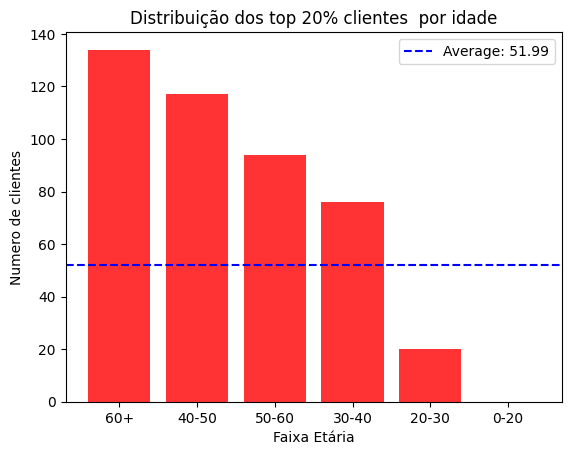

In [ ]:
average_count = clients_top20['Age'].mean()
plt.bar(amount_per_age['Age_Interval'], amount_per_age['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Faixa Etária')
plt.ylabel('Numero de clientes')
plt.title('Distribuição dos top 20% clientes  por idade')
plt.legend()

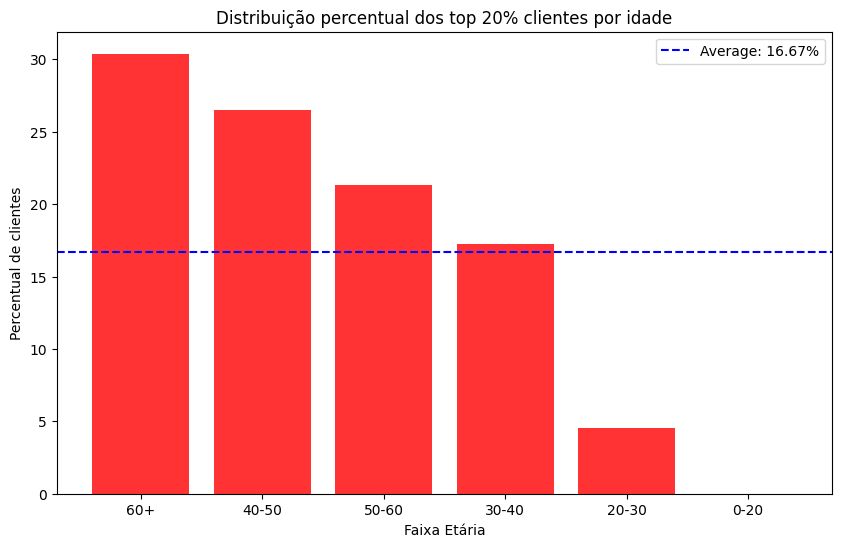

In [ ]:
average_percentage = amount_per_age['%'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(amount_per_age['Age_Interval'], amount_per_age['%'], color='#FF3333')
plt.title('Distribution of Age Intervals among Top 20% Clients')
plt.xlabel('Faixa Etária')
plt.ylabel('Percentual de clientes')

# Add a horizontal line for the average
plt.axhline(y=average_percentage, color='blue', linestyle='--', label=f'Average: {average_percentage:.2f}%')
plt.legend() # Show the legend
plt.title('Distribuição percentual dos top 20% clientes por idade')

plt.show()

# Analysis #2 : Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por estado civil?

In [ ]:
marital_status_distribution = clients_top20.groupby('Marital_Status')['MntTotal'].count().sort_values(ascending = False).reset_index()
marital_status_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
marital_status_distribution['%'] = round((marital_status_distribution['Count'] / marital_status_distribution['Count'].sum()* 100), 2)

marital_status_distribution

,Marital_Status,Count,%
0,Casado(a),169,38.32
1,Juntos,111,25.17
2,Solteiro(a),103,23.36
3,Divorciado(a),42,9.52
4,Viúvo(a),16,3.63


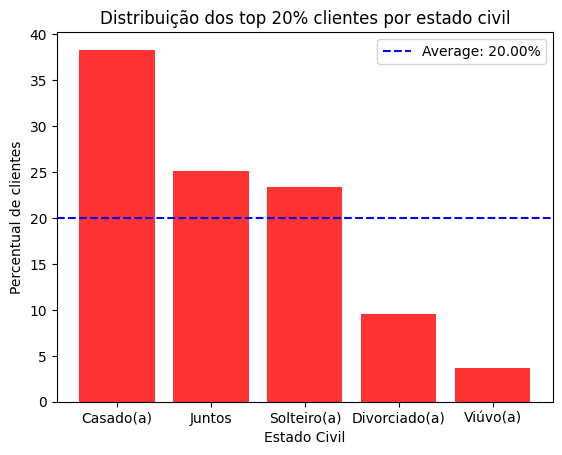

In [ ]:
average_percentage = marital_status_distribution['%'].mean()


plt.bar(marital_status_distribution['Marital_Status'], marital_status_distribution['%'], color = '#FF3333')
plt.axhline(y=average_percentage, color='blue', linestyle='--', label=f'Average: {average_percentage:.2f}%')
plt.title('Distribuição dos top 20% clientes por estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Percentual de clientes')

plt.legend()

# Analysis #3 : Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por tempo de casa?

Text(13.819444444444445, 0.5, 'Numero de clientes')

<Figure size 1500x600 with 0 Axes>

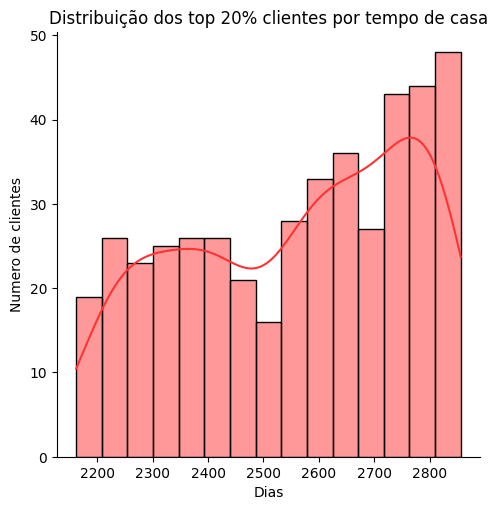

In [ ]:
plt.figure(figsize=(15, 6))
sns.displot(data = clients_top20, x = 'Customer_Days', bins = 15, kde = True, color = '#FF3333')
plt.title('Distribuição dos top 20% clientes por tempo de casa')
plt.xlabel('Dias')
plt.ylabel('Numero de clientes')

# Analysis 4 : Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por numero de visitas no site mensal?

In [ ]:
NumWebVisitsMonth_distribution = clients_top20.groupby('NumWebVisitsMonth')['MntTotal'].count().sort_values(ascending = False).reset_index()
NumWebVisitsMonth_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
NumWebVisitsMonth_distribution

,NumWebVisitsMonth,Count
0,2,100
1,3,83
2,1,80
3,6,51
4,4,41
5,5,34
6,8,28
7,7,19
8,0,3
9,9,2


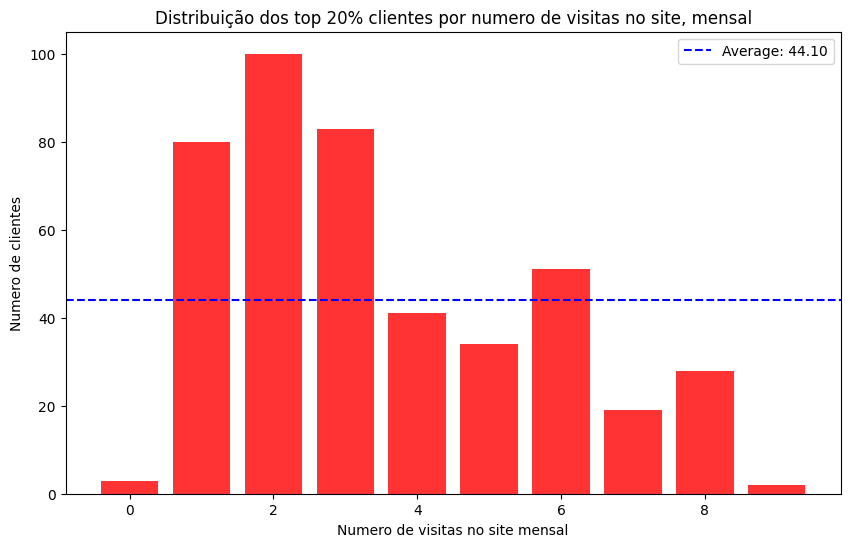

In [ ]:
average_count = NumWebVisitsMonth_distribution['Count'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(NumWebVisitsMonth_distribution['NumWebVisitsMonth'], NumWebVisitsMonth_distribution['Count'], color='#FF3333')
plt.xlabel('Numero de visitas no site mensal')
plt.ylabel('Numero de clientes') # Corrected y-axis label
plt.title('Distribuição dos top 20% clientes por numero de visitas no site, mensal')

# Add a horizontal line for the average
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.legend() # Show the legend

plt.show()

# Analysis 5 : Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por compras de vinho?

In [ ]:
# Adicionando a classificação de Intervalo de consumo de vinho em nosso DataFrame

bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, float('inf')]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400+']


clients_top20['MntWines_Interval'] = pd.cut(clients_top20['MntWines'], bins=bins, labels=labels, right=True)

In [ ]:
MntWines_distribution = clients_top20.groupby('MntWines_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntWines_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntWines_distribution

<ipython-input-178-82a565469500>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntWines_distribution = clients_top20.groupby('MntWines_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntWines_Interval,Count
0,0-200,1
1,1400+,9
2,1200-1400,33
3,200-400,37
4,1000-1200,69
5,400-600,89
6,600-800,99
7,800-1000,104


In [ ]:
MntWines_distribution.describe()

,Count
count,8.000000
mean,55.125000
std,40.583028
min,1.000000
25%,27.000000
50%,53.000000
75%,91.500000
max,104.000000


In [ ]:
MntWines_distribution

,MntWines_Interval,Count
0,0-200,1
1,200-400,37
2,400-600,89
3,600-800,99
4,800-1000,104
5,1000-1200,69
6,1200-1400,33
7,1400+,9


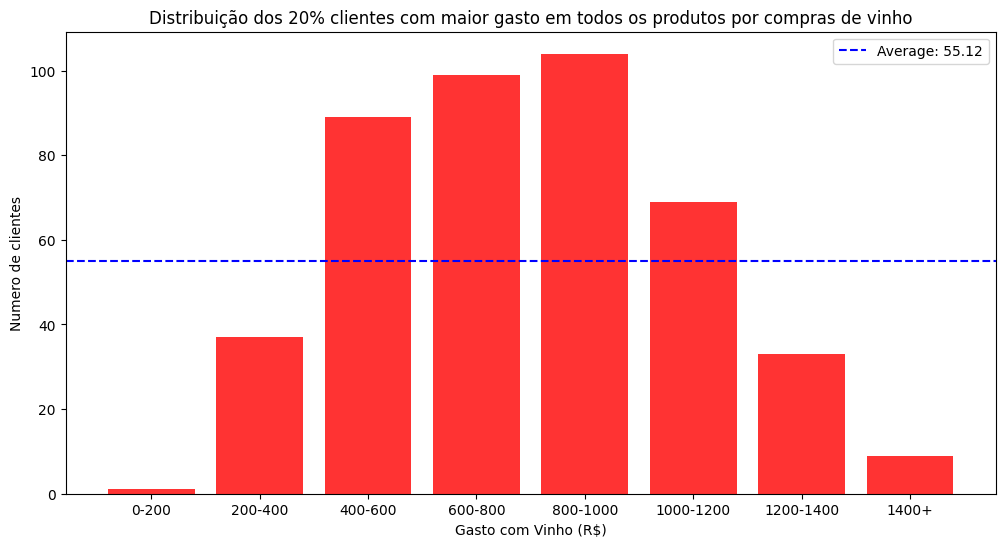

In [ ]:
desired_order = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400+']
MntWines_distribution['MntWines_Interval'] = pd.Categorical(MntWines_distribution['MntWines_Interval'], categories=desired_order, ordered=True)
MntWines_distribution = MntWines_distribution.sort_values('MntWines_Interval')

average_count = MntWines_distribution['Count'].mean()

plt.figure(figsize=(12, 6))
plt.bar(MntWines_distribution['MntWines_Interval'], MntWines_distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Gasto com Vinho (R$)')
plt.ylabel('Numero de clientes')
plt.title('Distribuição dos 20% clientes com maior gasto em todos os produtos por compras de vinho')
plt.legend()
plt.show()

# Analysis 6: Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por compras de frutas?

In [ ]:
MntFruits_distribution = clients_top20.groupby('MntFruits')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntFruits_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntFruits_distribution

,MntFruits,Count
0,149,1
1,126,1
2,88,1
3,130,1
4,83,1
...,...,...
112,19,9
113,26,10
114,80,13
115,12,16


In [ ]:
MntFruits_distribution.describe()

,MntFruits,Count
count,117.000000,117.000000
mean,85.743590,3.769231
std,52.581653,3.977056
min,0.000000,1.000000
25%,40.000000,2.000000
50%,79.000000,3.000000
75%,130.000000,5.000000
max,194.000000,37.000000


In [ ]:
bins = [0, 25, 50, 75, 100, 125, 150, 175, float('inf')]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']


clients_top20['MntFruits_Interval'] = pd.cut(clients_top20['MntFruits'], bins=bins, labels=labels, right=True)

In [ ]:
MntFruits_distribution = clients_top20.groupby('MntFruits_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntFruits_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntFruits_distribution

<ipython-input-26-a28af8235eae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntFruits_distribution = clients_top20.groupby('MntFruits_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntFruits_Interval,Count
0,175+,11
1,150-175,21
2,100-125,33
3,125-150,36
4,75-100,56
5,50-75,71
6,0-25,83
7,25-50,93


Text(0.5, 1.0, 'Distribuição dos top 20% clientes por compras de frutas')

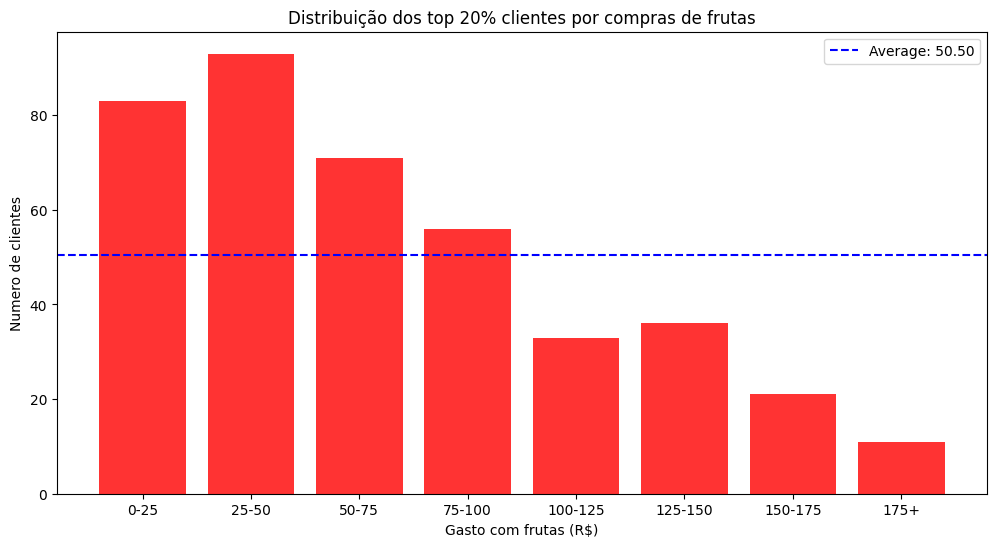

In [ ]:
desired_order = labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']
MntFruits_distribution['MntFruits_Interval'] = pd.Categorical(MntFruits_distribution['MntFruits_Interval'], categories=desired_order, ordered=True)
MntFruits_distribution = MntFruits_distribution.sort_values('MntFruits_Interval')

average_count = MntFruits_distribution['Count'].mean()


plt.figure(figsize=(12, 6))
plt.bar(MntFruits_distribution['MntFruits_Interval'], MntFruits_distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Gasto com frutas (R$)')
plt.ylabel('Numero de clientes')
plt.legend()
plt.title('Distribuição dos top 20% clientes por compras de frutas')

# Analysis 7: Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por compras de produtos com carne?

In [ ]:
clients_top20['MntMeatProducts'].describe()

,MntMeatProducts
count,441.000000
mean,484.138322
std,241.429825
min,45.000000
25%,294.000000
50%,449.000000
75%,672.000000
max,1725.000000


In [ ]:
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, float('inf')]
labels = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-150', '1500-1750', '1750+']


clients_top20['MntMeatProducts_Interval'] = pd.cut(clients_top20['MntMeatProducts'], bins=bins, labels=labels, right=True)

In [ ]:
MntMeatProducts_distribution = clients_top20.groupby('MntMeatProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntMeatProducts_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntMeatProducts_distribution

<ipython-input-78-0297a0aa397d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntMeatProducts_distribution = clients_top20.groupby('MntMeatProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntMeatProducts_Interval,Count
0,1000-1250,0
1,1250-150,0
2,1750+,0
3,1500-1750,1
4,750-1000,73
5,0-250,81
6,500-750,118
7,250-500,168


Text(0.5, 1.0, 'Distribuição dos top 20% clientes por compras de carne')

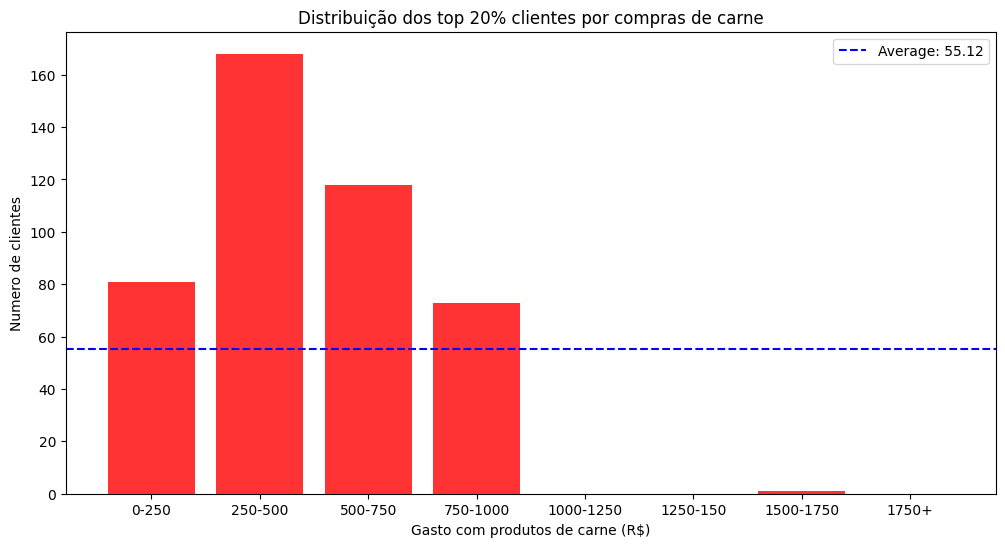

In [ ]:
desired_order = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-150', '1500-1750', '1750+']
MntMeatProducts_distribution['MntMeatProducts_Interval'] = pd.Categorical(MntMeatProducts_distribution['MntMeatProducts_Interval'], categories=desired_order, ordered=True)
MntMeatProducts_distribution = MntMeatProducts_distribution.sort_values('MntMeatProducts_Interval')

average_count = MntMeatProducts_distribution['Count'].mean()

plt.figure(figsize=(12, 6))
plt.bar(MntMeatProducts_distribution['MntMeatProducts_Interval'], MntMeatProducts_distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Gasto com produtos de carne (R$)')
plt.ylabel('Numero de clientes')
plt.legend()
plt.title('Distribuição dos top 20% clientes por compras de carne')

# Analysis 8: Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por compras de produtos com peixe?

In [ ]:
clients_top20['MntFishProducts'].describe()

,MntFishProducts
count,441.000000
mean,92.850340
std,67.840524
min,0.000000
25%,38.000000
50%,78.000000
75%,145.000000
max,258.000000


In [ ]:
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250+']


clients_top20['MntFishProducts_Interval'] = pd.cut(clients_top20['MntFishProducts'], bins=bins, labels=labels, right=True)

In [ ]:
MntFishProducts_Distribution = clients_top20.groupby('MntFishProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntFishProducts_Distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntFishProducts_Distribution

<ipython-input-34-fb7af8bfb3f5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntFishProducts_Distribution = clients_top20.groupby('MntFishProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntFishProducts_Interval,Count
0,250+,3
1,200-250,42
2,150-200,49
3,100-150,74
4,50-100,120
5,0-50,121


Text(0.5, 1.0, 'Distribuição dos top 20% clientes por compras de peixe')

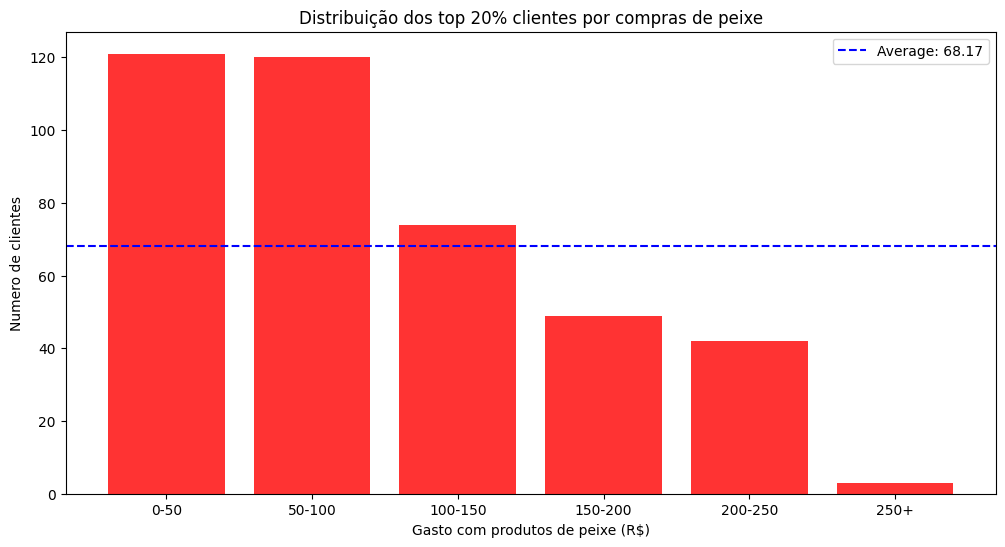

In [ ]:
desired_order = ['0-50', '50-100', '100-150', '150-200', '200-250', '250+']
average_count = MntFishProducts_Distribution['Count'].mean()

MntFishProducts_Distribution['MntFishProducts_Interval'] = pd.Categorical(MntFishProducts_Distribution['MntFishProducts_Interval'], categories=desired_order, ordered=True)
MntFishProducts_Distribution = MntFishProducts_Distribution.sort_values('MntFishProducts_Interval')

plt.figure(figsize=(12, 6))
plt.bar(MntFishProducts_Distribution['MntFishProducts_Interval'], MntFishProducts_Distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Gasto com produtos de peixe (R$)')
plt.ylabel('Numero de clientes')
plt.legend()
plt.title('Distribuição dos top 20% clientes por compras de peixe')

# Analysis 9: Qual a distribuição dos 20% clientes com maior gasto em todos os produtos por compras de produtos com doces?

In [ ]:
clients_top20['MntSweetProducts'].describe()

,MntSweetProducts
count,441.000000
mean,66.253968
std,52.622531
min,0.000000
25%,24.000000
50%,53.000000
75%,100.000000
max,198.000000


In [ ]:
bins = [0, 25, 50, 75, 100, 125, 150, 175, float('inf')]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']


clients_top20['MntSweetProducts_Interval'] = pd.cut(clients_top20['MntSweetProducts'], bins=bins, labels=labels, right=True)

In [ ]:
MntSweetProducts_Distribution = clients_top20.groupby('MntSweetProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntSweetProducts_Distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntSweetProducts_Distribution

<ipython-input-38-122d12745a04>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntSweetProducts_Distribution = clients_top20.groupby('MntSweetProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntSweetProducts_Interval,Count
0,175+,17
1,150-175,24
2,100-125,34
3,125-150,35
4,75-100,56
5,50-75,58
6,0-25,81
7,25-50,99


Text(0.5, 1.0, 'Distribuição dos top 20% clientes por compras de doces')

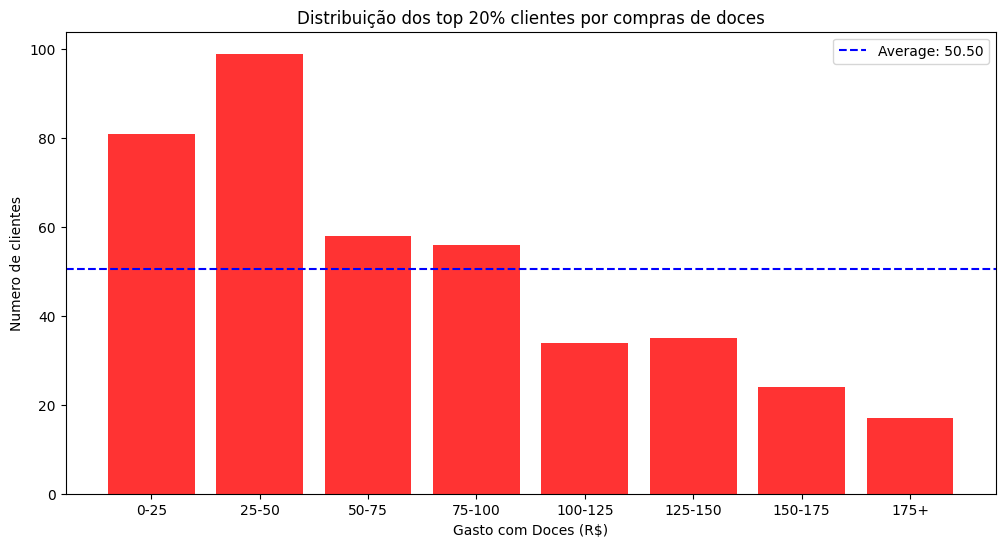

In [ ]:
desired_order = labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']
MntSweetProducts_Distribution['MntSweetProducts_Interval'] = pd.Categorical(MntSweetProducts_Distribution['MntSweetProducts_Interval'], categories=desired_order, ordered=True)
MntSweetProducts_Distribution = MntSweetProducts_Distribution.sort_values('MntSweetProducts_Interval')

average_count = MntSweetProducts_Distribution['Count'].mean()

plt.figure(figsize=(12, 6))
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.bar(MntSweetProducts_Distribution['MntSweetProducts_Interval'], MntSweetProducts_Distribution['Count'], color = '#FF3333')
plt.xlabel('Gasto com Doces (R$)')
plt.ylabel('Numero de clientes')
plt.legend()
plt.title('Distribuição dos top 20% clientes por compras de doces')

# Encontrando correlação entre as dimensões

In [ ]:
clients_top20_heatmap = clients_top20.drop(columns = ['Marital_Status', 'Age_Interval', 'MntWines_Interval',
                                                      'MntFruits_Interval',	'MntMeatProducts_Interval',	'MntFishProducts_Interval',
                                                      'MntSweetProducts_Interval'])

In [ ]:
clients_top20_heatmap

,Age,Customer_Days,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntTotal
0,32,2496,4,1259,172,815,97,148,2491
1,29,2295,1,1156,120,915,94,144,2429
2,29,2295,1,1156,120,915,94,144,2429
3,50,2296,2,1302,68,731,89,114,2304
4,51,2406,5,1394,22,708,89,91,2304
...,...,...,...,...,...,...,...,...,...
436,55,2179,1,227,151,573,98,54,1103
437,67,2758,6,815,10,239,28,10,1102
438,55,2657,4,753,43,226,69,10,1101
439,46,2241,2,471,0,510,99,21,1101


In [ ]:
corr = clients_top20_heatmap.corr()
corr2 = corr['MntTotal']

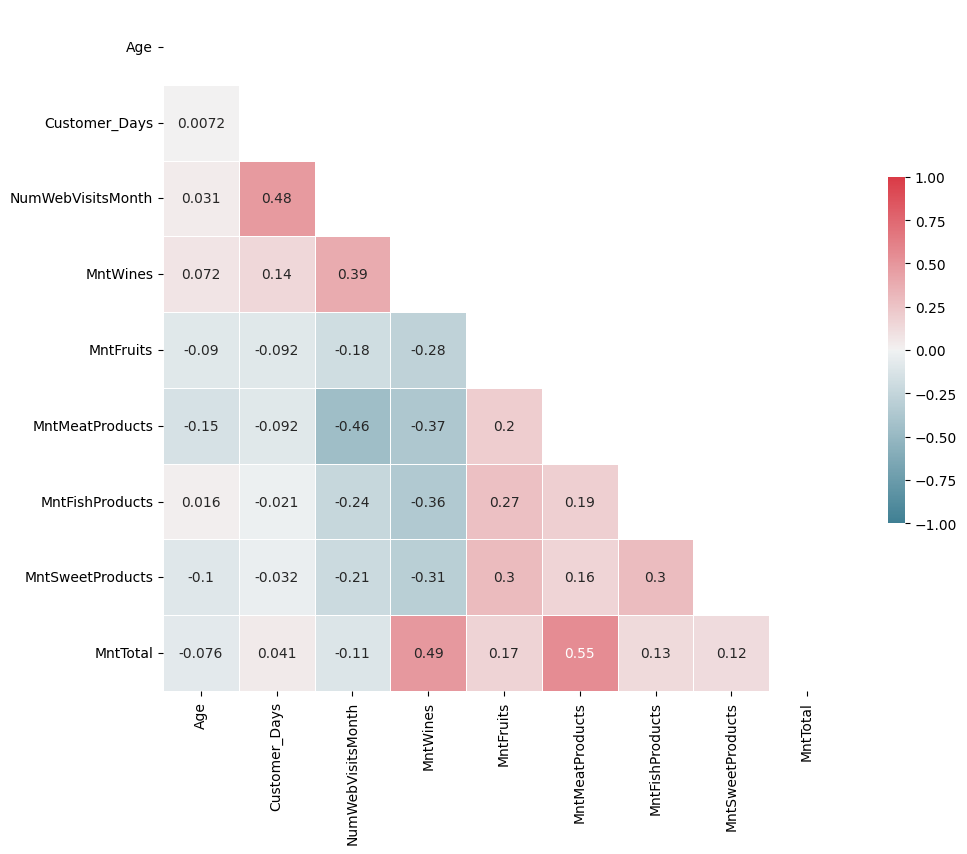

In [ ]:
# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Quais fatores estão mais correlacionados?
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

O objetivo desta análise é ajudar a equipe de Marketing a conseguir melhores resultados em sua próxima campanha.

A coluna do nosso conjunto de dados que quantifica os resultados é "MntTotal", que representa o faturamento total com aquele cliente, no período em que foram coletados os dados.

Realizando o Mapa de calor acima e analisando a última linha do mesmo, podemos analisar a correlação entre o Faturamento e as demais dimensões, onde podemos observar:

• Faturamento x Idade, tempo como cliente, Numero de visitas no site, compra de Frutas, Compra de peixes e compra de doces: **Correlação Fraca**

• Faturamento x Compra de Vinhos e Compra de Produtos com Carne: **Correlação Forte**

Assim, faremos análises do Faturamento 'MntTotal' em função dos demais fatores, com gráficos de dispersão e do comportamento das variáveis isoladas.

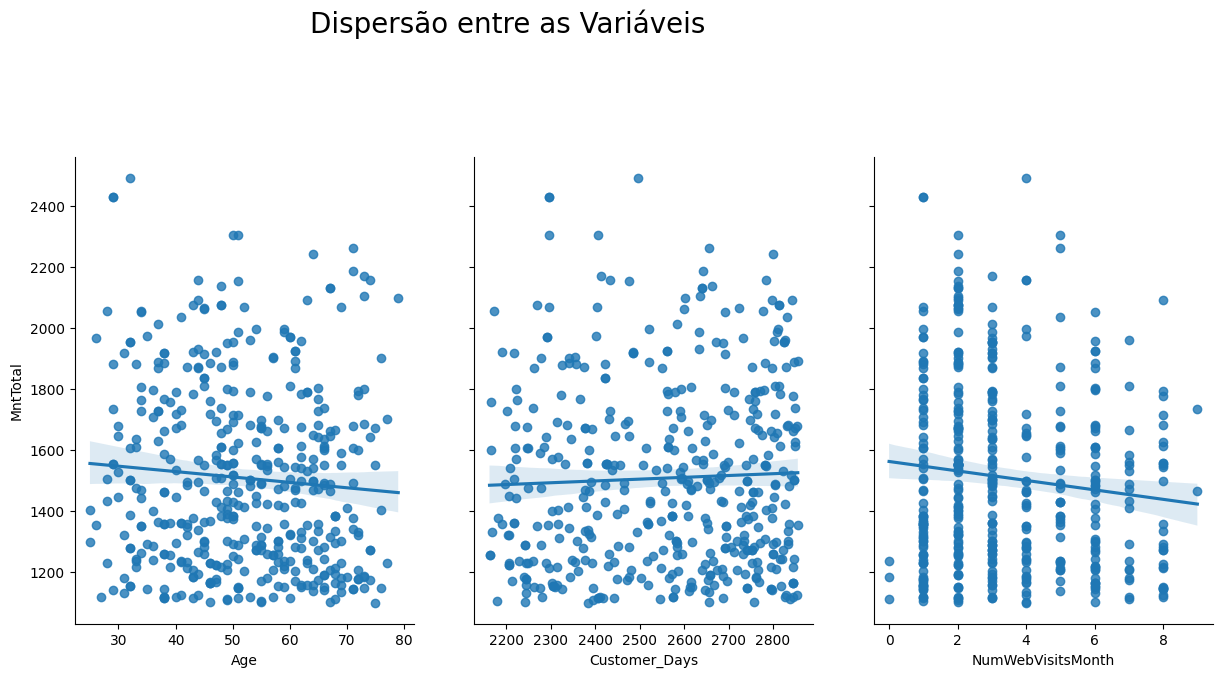

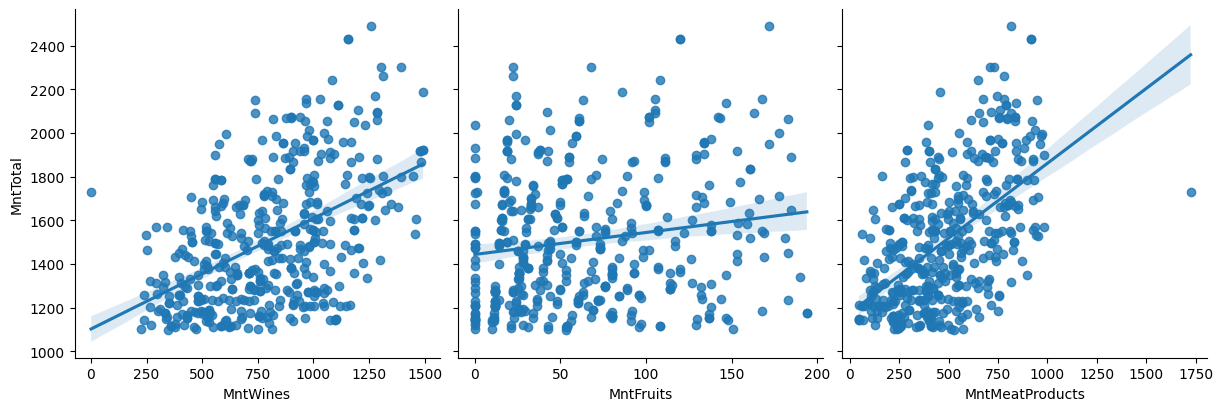

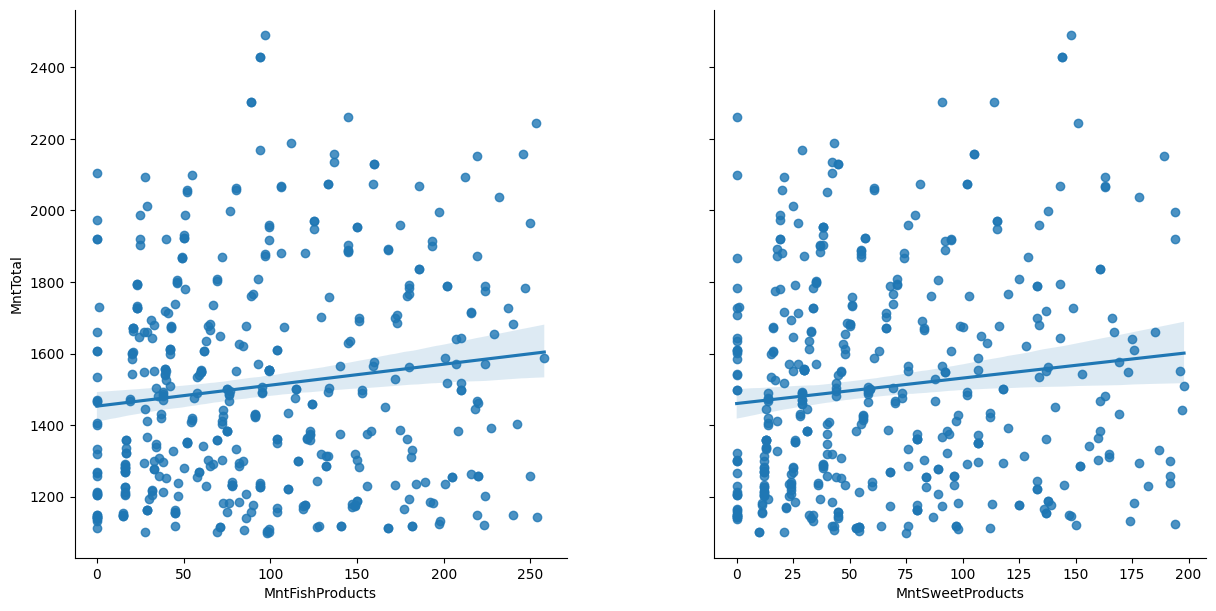

In [ ]:
import matplotlib.pyplot as plt

ax = sns.pairplot(data = clients_top20, y_vars = 'MntTotal', x_vars = ['Age', 'Customer_Days', 'NumWebVisitsMonth'], height = 1.18, kind = 'reg')
sns.pairplot(data = clients_top20, y_vars = 'MntTotal', x_vars = ['MntWines', 'MntFruits', 'MntMeatProducts'], height = 4.14, kind = 'reg')
sns.pairplot(data = clients_top20, y_vars = 'MntTotal', x_vars = ['MntFishProducts', 'MntSweetProducts'], height = 6.175, kind = 'reg')

ax.figure.set_size_inches(15, 10) # Increased figure size to accommodate 3 charts per row
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

# Adjust subplot parameters for a tighter layout
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax

In [ ]:
distribuicao_Faturamento_Carne = clients_top20['MntMeatProducts'].tolist()
distribuicao_Faturamento_Vinho = clients_top20['MntWines'].tolist()
distribuicao_Faturamento_Total = clients_top20['MntTotal'].tolist()

distribuicao_Faturamento_Carne_Vinho = pd.concat([pd.Series(distribuicao_Faturamento_Carne), pd.Series(distribuicao_Faturamento_Vinho)], axis=1)
distribuicao_Faturamento_Carne_Vinho.rename(columns={0: 'Vinho', 1: 'Carne'})


,Vinho,Carne
0,815,1259
1,915,1156
2,915,1156
3,731,1302
4,708,1394
...,...,...
436,573,227
437,239,815
438,226,753
439,510,471


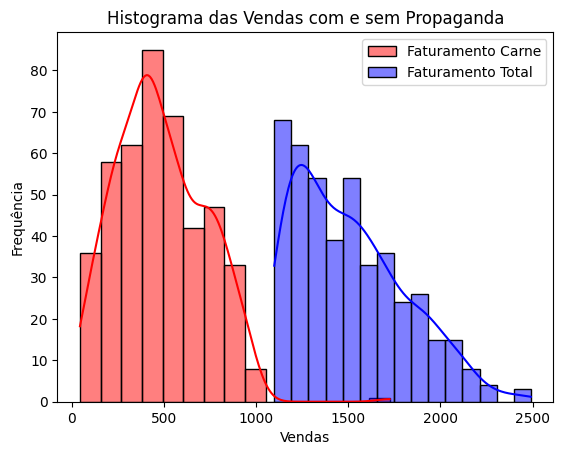

In [ ]:
#Analisando a distribuição da compra de produtos ocm carne a da Receita Total


ax = sns.histplot(distribuicao_Faturamento_Carne, bins = 15, kde = True, label = 'Faturamento Carne', color = 'Red')
sns.histplot(distribuicao_Faturamento_Total, bins = 15, kde = True, label = 'Faturamento Total', color = 'Blue')

plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas com e sem Propaganda')
plt.legend()
plt.show()

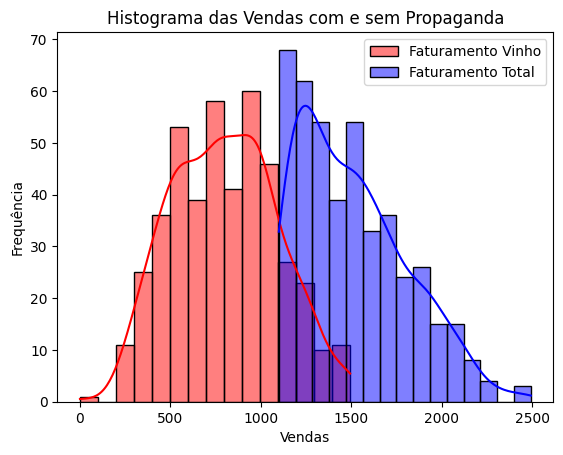

In [ ]:
#Analisando a distribuição da compra de produtos Vinho a da Receita Total


ax = sns.histplot(distribuicao_Faturamento_Vinho, bins = 15, kde = True, label = 'Faturamento Vinho', color = 'Red')
sns.histplot(distribuicao_Faturamento_Total, bins = 15, kde = True, label = 'Faturamento Total', color = 'Blue')

plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.title('Histograma das Vendas com e sem Propaganda')
plt.legend()
plt.show()

# **Análise gráfica e descritiva: Resultado**

Com base nesses resultados, uma ação sugerida é a que seja voltada para alcançar o seguinte perfil de consumidor, que representa o padrão do cliente que está entre os 20% mais rentáveis de toda operação:

###Cluster: Top 20% Clientes com maior gasto (451 clientes)
* Maior parte é composta por clientes com 60+ anos (30.39%). Quando analisamos o grupo dos 40+, do qual 60+ está incluso, esta medida chega a 78.24%.
* Maior parte é casada (38.32%), sendo 63.49% 'Casados' ou 'Juntos'
* Clientes mais jovens são minoria, contudo fazer compras de ticket maior
* O consumo preferencial deste grupo é **Vinhos** e **Produtos com Carne**, havendo forte correlação entre o consumo destes e o gasto total.
* Poucas visitas no site (provavelmente, apenas para efetuar compras)